# Project 1: SAT & ACT Analysis

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [Problem Statement](#Problem-Statement)
- [2017 Data Import and Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Problem Statement

<span style="color:blue">Where would money be best spent to improve SAT participation rates?</span>


## Executive Summary


The new format for the SAT was released in March 2016. As an employee of the College Board - the organization that administers the SAT - you are a part of a team that tracks statewide participation and recommends where money is best spent to improve SAT participation rates. Your presentation and report should be geared toward non-technical executives with the College Board and you will use the provided data and outside research to make recommendations about how the College Board might work to increase the participation rate in a state of your choice.

The Board has tasked a team to track statewide participation rates with the goal to improve SAT particaption with (streategic) investments. We have gather the data for both ACT and SAT for the years 2017 and 2018. You can find all data sets here: [data](https://git.generalassemb.ly/MattBurr77/project_1/tree/master/data). Data sources for [ACT 2017](https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf) and [ACT 2018](https://ipsr.ku.edu/ksdata/ksah/education/6ed16.pdf) and [SAT 2017 & 2018](https://ipsr.ku.edu/ksdata/ksah/education/6ed16.pdf). States like California and Washington who both avearge about a 60% particaption rate. 

2. Description of data
    - REQUIRED: Size (samples & features)
    - REQUIRED: Source (provide a link to the original source if possible, or describe how/where you acquired it)
    - REQUIRED: Target (classification/regression/unsupervised)
    - RECOMMENDED: Data dictionary (describe every feature in your data set, or at least those features that were prominent in your final model)
    - Consider including a plot or two from your EDA
4. Primary findings/conclusions/recommendations
    - These should follow from your project
    - You should provide an answer to your problem statement
5. Next steps
    - **Always** focus on the positive (it's not what you did wrong, it's what you look forward to improving).
    - Is your model ready for production? Probably not, but you can comment on how it might get there.
    - Does this project demonstrate skills that you think could be applied to similar problems?

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

<span style="color:blue">
    
#### Data Description

- SAT and ACT Data sets has an enter for each state and the distrit of Columbia
    - ACT includes the national average
    - both have a participation rate
- The SAT total scores that are high seem to be associated with a lower partipation rate from the state.

- The ACT seems to be a more popular than the SAT from the Participation
</span>

#### 4a. Does the data look complete? 

<span style="color:blue">The data looks complete to be complete.</span>

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [5]:
act_2017[['English', 'Math', 'Reading', 'Science', 'Composite']].describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [6]:
sat_2017[['Evidence-Based Reading and Writing', 'Math', 'Total']].describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


<span style="color:blue">
There are three obvious issues with the data sets. One, the composite column did not show any statistics when I ran the describe function, which usaully means the column is not a numeric cloumn type. In other words, the composite column has an entry that contains a charter making the column non-numeric. Second, the dataset ACT 2027 seems to have an outlier in the science column because it exceeds 3 standard devations way from the mean. The entry should be (investgated) further. Lastly, the SAT math section has a miniumm of 52, which is impossible to have as a score because the min score for both sections of the SAT is 400.(reference 1) The minium has to be an entry mistake, and I will have to reference where the data was pulled. 
</span>

*reference to SAT Min and Max score (1)*
https://www.princetonreview.com/college-advice/good-sat-scores
*reference to ACT Min and Max score(2)*
https://blog.prepscholar.com/minimum-act-score-for-college

#### 4c. Fix any errors you identified


In [7]:
#Fixing data issues in act & sat 2017
act_2017[(act_2017['Science'] == act_2017['Science'].min())] #Finds that Maryland has the mininum entry
#The ACT Science data for Maryland is a typo. It should be 23.2.  referance https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf

act_2017.loc[act_2017['State']=='Maryland', 'Science'] = 23.2
#act_2017.describe() Checked the min value


sat_2017[(sat_2017['Math'] == sat_2017['Math'].min())]       #Finds that Maryland has the mininum entry
# The SAT Math data for Maryland has a typo. It should be 524. reference here https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/

sat_2017.loc[sat_2017['State']=='Maryland', 'Math'] = 524 #replaces 52 data with the correct 524 data. 
# sat_2017.describe() Checked the min value

#### 5. What are your data types? 
Display the data types of each feature. 

In [8]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [9]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

<span style="color:blue">For ACT 2017, one of the types is not what I was expected. The Composite feature data type was object, but I would expect the feature should be a float. Also, participation should be a float as well</span>

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [10]:
def percents_to_floats(series):
    return float(series.replace('%',''))/100

- Fix any individual values preventing other columns from being the appropriate type.

In [11]:
def removing_char_x(num):
    try:
        return float(num.replace('x',''))
    except:
        return float(num)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [12]:
act_2017['Participation'] = act_2017['Participation'].map(percents_to_floats)
sat_2017['Participation'] = sat_2017['Participation'].map(percents_to_floats)
act_2017['Composite'] = act_2017['Composite'].map(removing_char_x)                                       

- Display the data types again to confirm they are correct.

In [13]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [14]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [15]:
#Dictionaries with new column names for act & sat
new_column_names_act_2017 = {
    'State':'state',
    'Participation':'participation_act_2017',
    'English':'english_average_act_2017',
    'Math':'math_average_act_2017',
    'Reading':'reading_average_act_2017',
    'Science':'science_average_act_2017',
    'Composite':'composite_average_act_2017'
}

new_column_names_sat_2017 = {
    'State':'state',
    'Participation':'participation_sat_2017',
    'Evidence-Based Reading and Writing':'reading_and_writing_sat_2017', 
    'Math':'math_sat_2017',
    'Total':'total_sat_2017'
}

act_2017.rename(columns = new_column_names_act_2017, inplace = True)
sat_2017.rename(columns = new_column_names_sat_2017, inplace = True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state** | *object* | ACT/SAT | each state and D.C|
|**participation_act_2017** | *float* | ACT 2017 | The percenatage of students in 2017 that took the ACT|
|**english_average_act_2017** | *float* | ACT 2017 | The average score of the english section on the ACT 2017|
|**math_average_act_2017** | *float* | ACT 2017 | The average score of the math section on the ACT 2017|
|**reading_average_act_2017** | *float* | ACT 2017 | The average score of the reading section on the ACT 2017|
|**science_average_act_2017** | *float* | ACT 2017 | The average score of the science section on the ACT 2017|
|**composite_average_act_2017** | *float* | ACT 2017 | The average composite score of the ACT 2017|
|**participation_sat_2017** | *float* | SAT 2017 | The percenatage of students in 2017 that took the SAT|
|**reading_and_writing_sat_2017** | *int* | SAT 2017 | The average score of the reading and writing section on the SAT 2017|
|**math_sat_2017** | *int* | SAT 2017 | The average score of the math section on the SAT 2017|
|**total_sat_2017** | *int* | SAT 2017 | The average overall teat score of the SAT 2017|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [16]:
#drops the national data row from ACT 2017
act_2017.drop(index=[0], inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [17]:
combined_2017 = pd.merge(act_2017, sat_2017)
combined_2017.head()

,state,participation_act_2017,english_average_act_2017,math_average_act_2017,reading_average_act_2017,science_average_act_2017,composite_average_act_2017,participation_sat_2017,reading_and_writing_sat_2017,math_sat_2017,total_sat_2017
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [18]:
combined_2017.to_csv('../data/combined_2017.csv', index = True)

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [19]:
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')

In [20]:
sat_2018.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [21]:
act_2018.describe()

,Composite
count,52.000000
mean,21.544231
std,2.119417
min,17.700000
25%,19.975000
50%,21.300000
75%,23.725000
max,25.600000


In [22]:
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [23]:
act_2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [24]:
act_2018['Participation'] = act_2018['Participation'].map(percents_to_floats)
sat_2018['Participation'] = sat_2018['Participation'].map(percents_to_floats)
act_2018.drop(20, inplace=True)

In [25]:
sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [26]:
act_2018.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

In [27]:
new_column_names_act_2018 = {
    'State':'state',
    'Participation':'participation_act_2018',
    'English':'english_average_act_2018',
    'Math':'math_average_act_2018',
    'Reading':'reading_average_act_2018',
    'Science':'science_average_act_2018',
    'Composite':'composite_average_act_2018'
}

new_column_names_sat_2018 = {
    'State':'state',
    'Participation':'participation_sat_2018',
    'Evidence-Based Reading and Writing':'reading_and_writing_sat_2018', 
    'Math':'math_sat_2018',
    'Total':'total_sat_2018'
}

act_2018.rename(columns = new_column_names_act_2018, inplace = True)
sat_2018.rename(columns = new_column_names_sat_2018, inplace = True)

In [28]:
act_2018.columns

Index(['state', 'participation_act_2018', 'composite_average_act_2018'], dtype='object')

In [29]:
sat_2018.columns

Index(['state', 'participation_sat_2018', 'reading_and_writing_sat_2018',
       'math_sat_2018', 'total_sat_2018'],
      dtype='object')

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**participation_act_2018** | *float* | ACT 2018 | The percenatage of students in 2018 that took the ACT|
|**composite_average_act_2018** | *float* | ACT 2018 | The average composite score of the ACT 2018|
|**participation_sat_2018** | *float* | SAT 2018 | The percenatage of students in 2018 that took the SAT|
|**reading_and_writing_sat_2018** | *int* | SAT 2018 | The average score of the reading and writing section on the SAT 2018|
|**math_sat_2018** | *int* | SAT 2018 | The average score of the math section on the SAT 2018|
|**total_sat_2018** | *int* | SAT 2018 | The average overall teat score of the SAT 2018|

In [30]:
combined_2018 = pd.merge(act_2018, sat_2018)
combined_2018.head()

,state,participation_act_2018,composite_average_act_2018,participation_sat_2018,reading_and_writing_sat_2018,math_sat_2018,total_sat_2018
0,Alabama,1.00,19.1,0.06,595,571,1166
1,Alaska,0.33,20.8,0.43,562,544,1106
2,Arizona,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,19.4,0.05,592,576,1169
4,California,0.27,22.7,0.60,540,536,1076


In [31]:
combined_2018.to_csv('../data/combined_2018.csv', index = True)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [32]:
final = pd.merge(combined_2017, combined_2018)

In [33]:
final.to_csv('../data/final.csv', index = True)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [34]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_act_2017,50.0,0.6592,0.321107,0.08,0.3100,0.71,1.000,1.0
english_average_act_2017,50.0,20.8620,2.324307,16.30,19.0000,20.55,23.100,25.5
math_average_act_2017,50.0,21.1360,1.973990,18.00,19.4000,20.90,23.000,25.3
reading_average_act_2017,50.0,21.9560,2.046317,18.10,20.4250,21.70,23.875,26.0
science_average_act_2017,50.0,21.4100,1.731962,18.20,19.9250,21.30,22.975,24.9
composite_average_act_2017,50.0,21.4660,2.004241,17.80,19.8000,21.40,23.400,25.5
participation_sat_2017,50.0,0.3860,0.345602,0.02,0.0400,0.34,0.650,1.0
reading_and_writing_sat_2017,50.0,570.8600,44.385146,503.00,535.2500,559.50,613.500,644.0
math_sat_2017,50.0,558.6600,45.839832,492.00,524.0000,549.50,601.000,651.0
total_sat_2017,50.0,1129.6200,89.913085,996.00,1057.0000,1107.50,1214.000,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [35]:
def standard_deviation(series):
    n = len(series)
    mu = series.mean()
    lst = []
    for x in series:
        lst.append((x - mu)**2)
    summat = sum(lst)
    return (summat/n)**(1/2)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [36]:
#Code:
sd = {x:standard_deviation(final.loc[:,x]) for x in list(final.columns[1:])}
sd

{'participation_act_2017': 0.3178794740149165,
 'english_average_act_2017': 2.3009467616613812,
 'math_average_act_2017': 1.9541504548012678,
 'reading_average_act_2017': 2.025750231395766,
 'science_average_act_2017': 1.7145553359399048,
 'composite_average_act_2017': 1.9840977798485642,
 'participation_sat_2017': 0.3421286307808805,
 'reading_and_writing_sat_2017': 43.9390532442382,
 'math_sat_2017': 45.37911854586864,
 'total_sat_2017': 89.00941298536914,
 'participation_act_2018': 0.33771254048376703,
 'composite_average_act_2018': 2.090091864009809,
 'participation_sat_2018': 0.36724754594142633,
 'reading_and_writing_sat_2018': 46.537937212558106,
 'math_sat_2018': 46.51518461749884,
 'total_sat_2018': 91.91248881408882}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [37]:
final.describe()

,participation_act_2017,english_average_act_2017,math_average_act_2017,reading_average_act_2017,science_average_act_2017,composite_average_act_2017,participation_sat_2017,reading_and_writing_sat_2017,math_sat_2017,total_sat_2017,participation_act_2018,composite_average_act_2018,participation_sat_2018,reading_and_writing_sat_2018,math_sat_2018,total_sat_2018
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.659200,20.862000,21.13600,21.956000,21.410000,21.466000,0.386000,570.860000,558.660000,1129.620000,0.623200,21.454000,0.448200,565.020000,557.760000,1122.880000
std,0.321107,2.324307,1.97399,2.046317,1.731962,2.004241,0.345602,44.385146,45.839832,89.913085,0.341141,2.111312,0.370976,47.010416,46.987432,92.845634
min,0.080000,16.300000,18.00000,18.100000,18.200000,17.800000,0.020000,503.000000,492.000000,996.000000,0.070000,17.700000,0.020000,480.000000,486.000000,998.000000
25%,0.310000,19.000000,19.40000,20.425000,19.925000,19.800000,0.040000,535.250000,524.000000,1057.000000,0.277500,19.925000,0.042500,535.000000,524.250000,1062.250000
50%,0.710000,20.550000,20.90000,21.700000,21.300000,21.400000,0.340000,559.500000,549.500000,1107.500000,0.660000,21.050000,0.500000,552.000000,545.500000,1098.500000
75%,1.000000,23.100000,23.00000,23.875000,22.975000,23.400000,0.650000,613.500000,601.000000,1214.000000,1.000000,23.650000,0.745000,612.750000,594.250000,1207.000000
max,1.000000,25.500000,25.30000,26.000000,24.900000,25.500000,1.000000,644.000000,651.000000,1295.000000,1.000000,25.600000,1.000000,643.000000,655.000000,1298.000000


In [38]:
np.std(final)

participation_act_2017           0.317879
english_average_act_2017         2.300947
math_average_act_2017            1.954150
reading_average_act_2017         2.025750
science_average_act_2017         1.714555
composite_average_act_2017       1.984098
participation_sat_2017           0.342129
reading_and_writing_sat_2017    43.939053
math_sat_2017                   45.379119
total_sat_2017                  89.009413
participation_act_2018           0.337713
composite_average_act_2018       2.090092
participation_sat_2018           0.367248
reading_and_writing_sat_2018    46.537937
math_sat_2018                   46.515185
total_sat_2018                  91.912489
dtype: float64

<span style="color:blue">Yes, my manual calculation is correct</span>

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [39]:
final.loc[:,['state','participation_act_2017']].sort_values('participation_act_2017').head(3) 

,state,participation_act_2017
18,Maine,0.08
7,Delaware,0.18
28,New Hampshire,0.18


<span style="color:blue">There are there states tied for the lowest ACT participation rate in 2017: Maine, Delaware, New Hampshire</span>

In [40]:
final.loc[:,['state','participation_act_2017']].sort_values('participation_act_2017', ascending=False).head(17) 

,state,participation_act_2017
0,Alabama,1.0
16,Kentucky,1.0
48,Wisconsin,1.0
43,Utah,1.0
41,Tennessee,1.0
39,South Carolina,1.0
35,Oklahoma,1.0
32,North Carolina,1.0
27,Nevada,1.0
24,Missouri,1.0


<span style="color:blue">There are 17 states tied for the highest ACT participation rate in 2017: Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, North Carolina, Nevada, Missouri, Mississippi, Minnesota, Louisiana, Montana, Wyoming, Arkansas, Colorado</span>

In [41]:
final.loc[:,['state','participation_act_2018']].sort_values('participation_act_2018').head()

,state,participation_act_2018
18,Maine,0.07
38,Rhode Island,0.15
28,New Hampshire,0.16
7,Delaware,0.17
37,Pennsylvania,0.20


<span style="color:blue">Maine had the lowest ACT participation rate in 2018.</span>

In [42]:
final.loc[:,['state','participation_act_2018']].sort_values('participation_act_2018',ascending=False).head(17) 

,state,participation_act_2018
0,Alabama,1.0
16,Kentucky,1.0
48,Wisconsin,1.0
43,Utah,1.0
41,Tennessee,1.0
39,South Carolina,1.0
35,Oklahoma,1.0
34,Ohio,1.0
32,North Carolina,1.0
27,Nevada,1.0


<span style="color:blue">There are 17 states tied for the highest ACT participation rate in 2018: Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, Ohio , North Carolina, Nevada,  Nebraska, Missouri, Mississippi, Minnesota, Louisiana, Montana, Wyoming, Arkansas</span>

In [43]:
final.loc[:,['state','participation_sat_2017']].sort_values('participation_sat_2017').head(3)

,state,participation_sat_2017
33,North Dakota,0.02
23,Mississippi,0.02
14,Iowa,0.02


<span style="color:blue">There are 3 states tied for the lowest SAT participation rate in 2017: North Dakota, Mississippi, Iowa</span>

In [44]:
final.loc[:,['state','participation_sat_2017']].sort_values('participation_sat_2017',ascending=False).head(3) 

,state,participation_sat_2017
21,Michigan,1.0
6,Connecticut,1.0
7,Delaware,1.0


<span style="color:blue">There are 5 states tied for the highest SAT participation rate in 2017: Michigan, Connecticut, Delaware</span>

In [45]:
final.loc[:,['state','participation_sat_2018']].sort_values('participation_sat_2018').head()

,state,participation_sat_2018
33,North Dakota,0.02
49,Wyoming,0.03
40,South Dakota,0.03
26,Nebraska,0.03
48,Wisconsin,0.03


<span style="color:blue">North Dakota had the lowest SAT participation rate in 2018.</span>

In [46]:
final.loc[:,['state','participation_sat_2018']].sort_values('participation_sat_2018',ascending=False).head() 

,state,participation_sat_2018
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0
21,Michigan,1.0
11,Idaho,1.0


<span style="color:blue">There are 5 states tied for the highest SAT participation rate in 2018: Colorado, Connecticut, Delaware, Michigan, Idaho</span>

In [47]:
final.loc[:,['state','total_sat_2017']].sort_values('total_sat_2017').head()

,state,total_sat_2017
7,Delaware,996
11,Idaho,1005
21,Michigan,1005
18,Maine,1012
8,Florida,1017


<span style="color:blue">Delaware had the lowest SAT total score in 2017.</span>

In [48]:
final.loc[:,['state','total_sat_2017']].sort_values('total_sat_2017',ascending=False).head() 

,state,total_sat_2017
22,Minnesota,1295
48,Wisconsin,1291
14,Iowa,1275
24,Missouri,1271
15,Kansas,1260


<span style="color:blue">Minnesota had the highest SAT total score in 2017.</span>

In [49]:
final.loc[:,['state','total_sat_2018']].sort_values('total_sat_2018').head()

,state,total_sat_2018
7,Delaware,998
47,West Virginia,999
11,Idaho,1001
43,Utah,1010
10,Hawaii,1010


<span style="color:blue">Delaware had the lowest SAT total score in 2018.</span>

In [50]:
final.loc[:,['state','total_sat_2018']].sort_values('total_sat_2018',ascending=False).head() 

,state,total_sat_2018
22,Minnesota,1298
48,Wisconsin,1294
33,North Dakota,1283
14,Iowa,1265
15,Kansas,1265


<span style="color:blue">Minnesota had the highest SAT total score in 2018.</span>

In [51]:
final.loc[:,['state','composite_average_act_2017']].sort_values('composite_average_act_2017').head()

,state,composite_average_act_2017
27,Nevada,17.8
23,Mississippi,18.6
39,South Carolina,18.7
10,Hawaii,19.0
32,North Carolina,19.1


<span style="color:blue">Nevada had the lowest ACT total score in 2017.</span>

In [52]:
final.loc[:,['state','composite_average_act_2017']].sort_values('composite_average_act_2017',ascending=False).head() 

,state,composite_average_act_2017
28,New Hampshire,25.5
20,Massachusetts,25.4
6,Connecticut,25.2
18,Maine,24.3
31,New York,24.2


<span style="color:blue">New Hampsire had the highest ACT total score in 2017.</span>

In [53]:
final.loc[:,['state','composite_average_act_2018']].sort_values('composite_average_act_2018').head()

,state,composite_average_act_2018
27,Nevada,17.7
39,South Carolina,18.3
23,Mississippi,18.6
10,Hawaii,18.9
0,Alabama,19.1


<span style="color:blue">Nevada had the lowest ACT total score in 2018.</span>

In [54]:
final.loc[:,['state','composite_average_act_2018']].sort_values('composite_average_act_2018',ascending=False).head() 

,state,composite_average_act_2018
6,Connecticut,25.6
20,Massachusetts,25.5
28,New Hampshire,25.1
31,New York,24.5
21,Michigan,24.2


<span style="color:blue">Connecticut had the highest ACT total score in 2017.</span>

In [55]:
mask = (final['participation_act_2017'] == 1) | (final['participation_act_2018'] == 1)
final.loc[mask,['state','participation_act_2017','participation_act_2018']]

,state,participation_act_2017,participation_act_2018
0,Alabama,1.00,1.00
3,Arkansas,1.00,1.00
5,Colorado,1.00,0.30
16,Kentucky,1.00,1.00
17,Louisiana,1.00,1.00
22,Minnesota,1.00,0.99
23,Mississippi,1.00,1.00
24,Missouri,1.00,1.00
25,Montana,1.00,1.00
26,Nebraska,0.84,1.00


<span style="color:blue">There are 4 of states that have changing particiption rates for the ACT year-or-year: Ohio, Nebraska, Colorado, Minnesota </span>

In [56]:
mask = (final['participation_sat_2017'] == 1) | (final['participation_sat_2018'] == 1)
final.loc[mask,['state','participation_sat_2017','participation_sat_2018']]

,state,participation_sat_2017,participation_sat_2018
5,Colorado,0.11,1.0
6,Connecticut,1.00,1.0
7,Delaware,1.00,1.0
11,Idaho,0.93,1.0
21,Michigan,1.00,1.0


<span style="color:blue">There are 2 of states that have changing particiption rates for the ACT year-or-year:  Colorado, idaho</span>

In [57]:
mask = (final['participation_act_2017'] > .5) & (final['participation_act_2018'] > .5)
final.loc[mask,['state','participation_act_2017','participation_act_2018']]

,state,participation_act_2017,participation_act_2018
0,Alabama,1.00,1.00
2,Arizona,0.62,0.66
3,Arkansas,1.00,1.00
8,Florida,0.73,0.66
9,Georgia,0.55,0.53
10,Hawaii,0.90,0.89
14,Iowa,0.67,0.68
15,Kansas,0.73,0.71
16,Kentucky,1.00,1.00
17,Louisiana,1.00,1.00


In [58]:
mask = (final['participation_sat_2017'] > .5) & (final['participation_sat_2018'] > .5)
final.loc[mask,['state','participation_sat_2017','participation_sat_2018']]

,state,participation_sat_2017,participation_sat_2018
4,California,0.53,0.60
6,Connecticut,1.00,1.00
7,Delaware,1.00,1.00
8,Florida,0.83,0.56
9,Georgia,0.61,0.70
10,Hawaii,0.55,0.56
11,Idaho,0.93,1.00
13,Indiana,0.63,0.63
18,Maine,0.95,0.99
19,Maryland,0.69,0.76


<span style="color:blue">The following states are especially interesting: Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, North Carolina, Nevada, Missouri, Mississippi, Minnesota, Louisiana, Montana, Wyoming, Arkansas, Colorado. They have the highest particaption rates in on one test while the other test is one of the lowest particatpation rates. Also, the total and composite scores to be worse with higher preatiaption rates.</span>


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

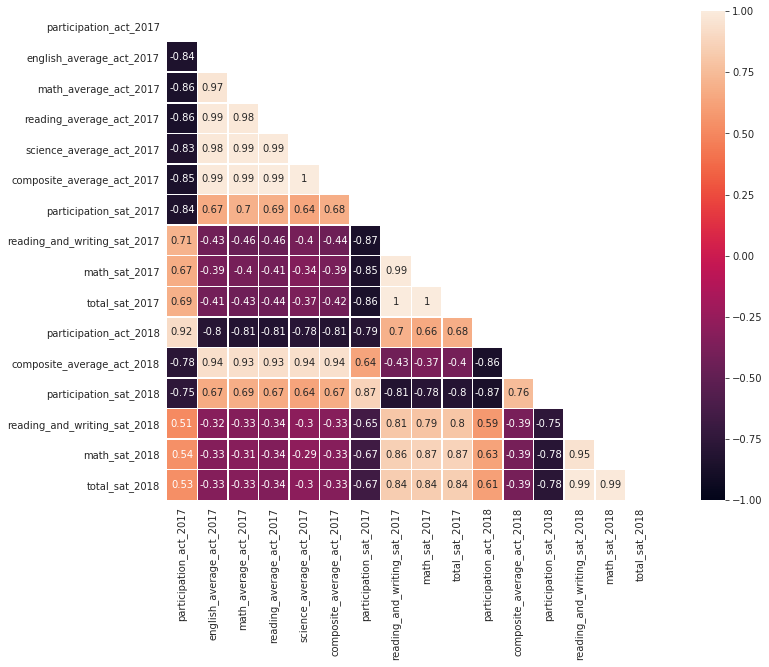

In [59]:
# This code has been slighty adapted from 2.02b-lesson-principles-of-data-visualization-part2

plt.figure(figsize = (16,9))

mask = np.zeros_like(final.corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(final.corr(), mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [60]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns))) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=1, figsize=(12, 9)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins = 10) # feel free to add more settings
        ax[i].set(xlabel=list_of_xlabels[i], title=list_of_titles[i])# Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

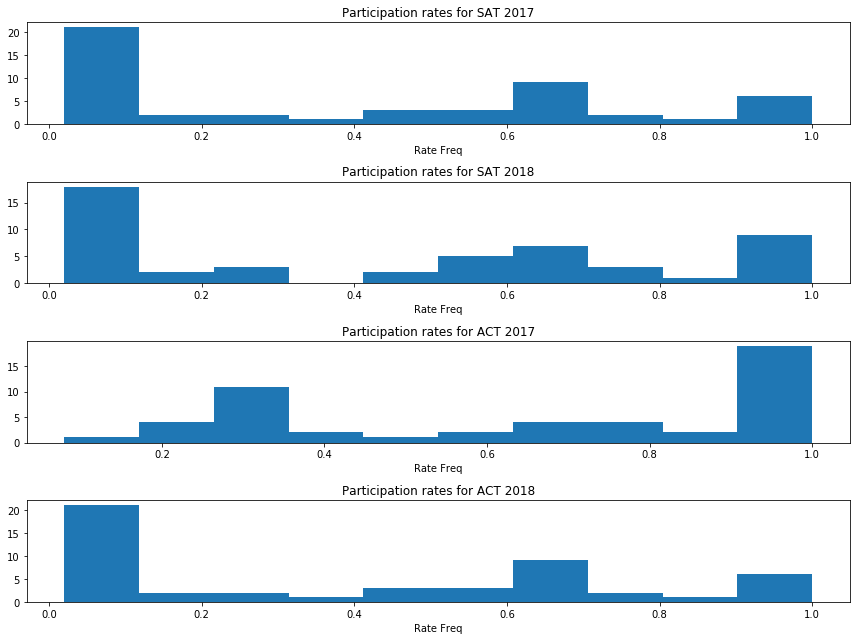

In [61]:
columns = ['participation_sat_2017', 'participation_sat_2018', 'participation_act_2017', 'participation_sat_2017']
titles = ['Participation rates for SAT 2017', 'Participation rates for SAT 2018', 'Participation rates for ACT 2017', 'Participation rates for ACT 2018']
xlabels = ['Rate Freq', 'Rate Freq', 'Rate Freq', 'Rate Freq']

subplot_histograms(final,columns,titles,xlabels)
plt.tight_layout()

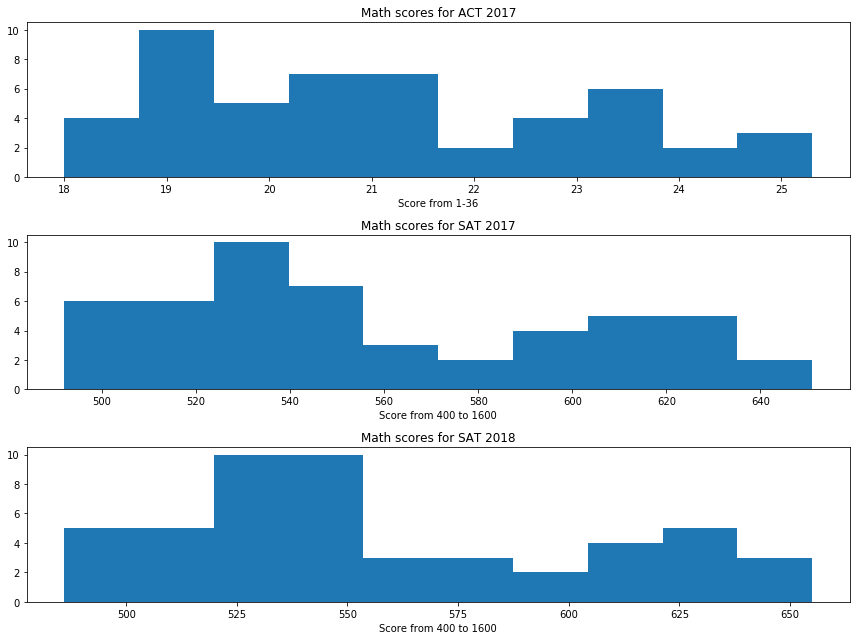

In [62]:
columns = ['math_average_act_2017', 'math_sat_2017', 'math_sat_2018']
titles = ['Math scores for ACT 2017', 'Math scores for SAT 2017', 'Math scores for SAT 2018']
xlabels = ['Score from 1-36', 'Score from 400 to 1600', 'Score from 400 to 1600']

subplot_histograms(final,columns,titles,xlabels)
plt.tight_layout()

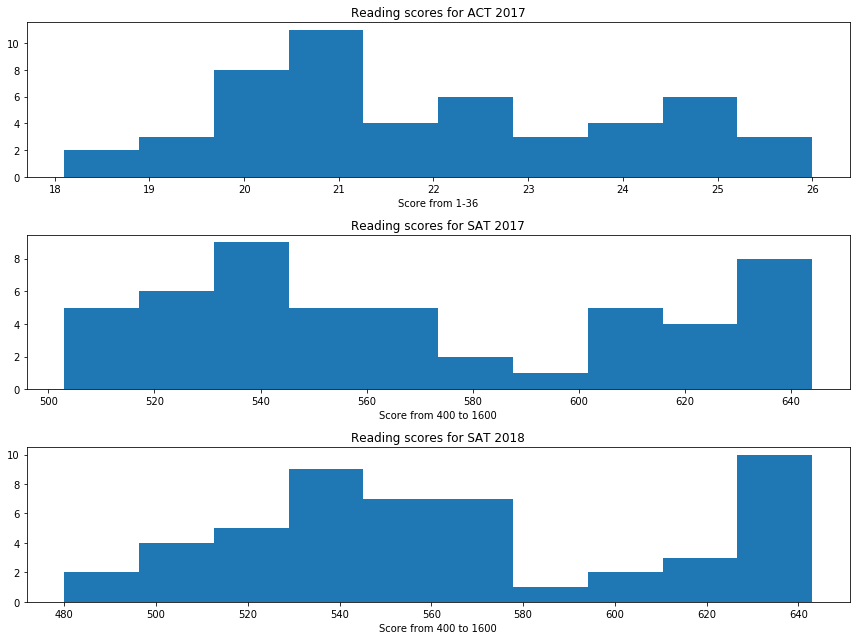

In [63]:
columns = ['reading_average_act_2017', 'reading_and_writing_sat_2017', 'reading_and_writing_sat_2018']
titles = ['Reading scores for ACT 2017', 'Reading scores for SAT 2017', 'Reading scores for SAT 2018']
xlabels = ['Score from 1-36', 'Score from 400 to 1600', 'Score from 400 to 1600']

subplot_histograms(final,columns,titles,xlabels)
plt.tight_layout()

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [64]:
def plot_scatter(dataframe, list_of_columns, title, xlabel, ylabel, color):
    plt.figure(figsize = (16, 9))
    plt.scatter(dataframe[list_of_columns[0]], dataframe[list_of_columns[1]], c=color)
    plt.title(title)
    plt.ylabel(ylabel, fontsize = 20)
    plt.xlabel(xlabel, fontsize = 20);
    

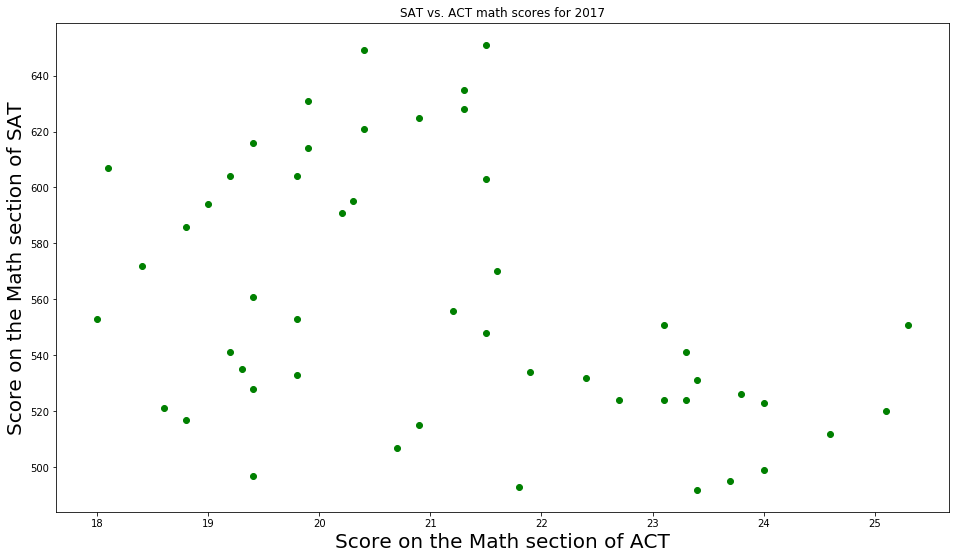

In [65]:
columns = ['math_average_act_2017', 'math_sat_2017']
title = 'SAT vs. ACT math scores for 2017'
xlabel = 'Score on the Math section of ACT'
ylabel = 'Score on the Math section of SAT'
plot_scatter(final, columns, title, xlabel, ylabel, 'green')


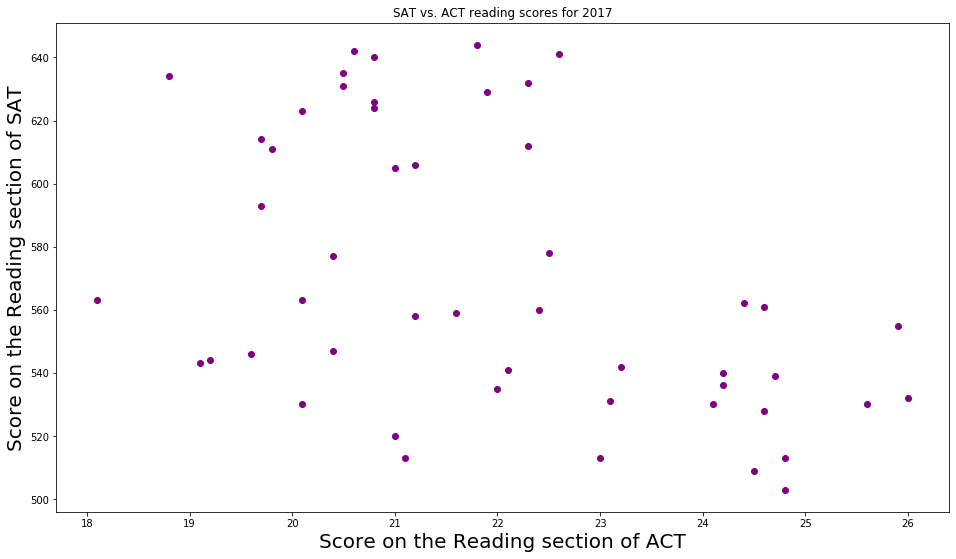

In [66]:
columns = ['reading_average_act_2017', 'reading_and_writing_sat_2017']
title = 'SAT vs. ACT reading scores for 2017'
xlabel = 'Score on the Reading section of ACT'
ylabel = 'Score on the Reading section of SAT'
plot_scatter(final, columns, title, xlabel, ylabel, 'purple')

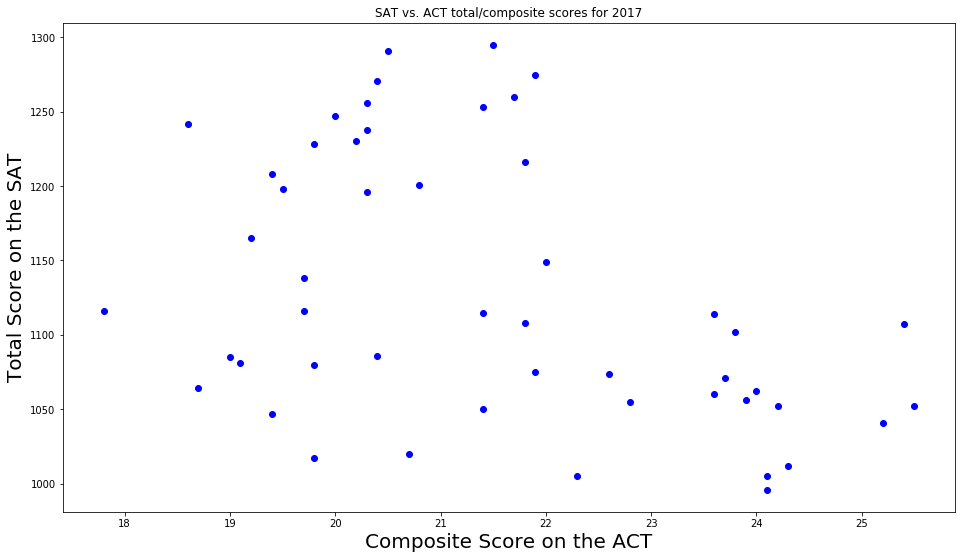

In [67]:
columns = ['composite_average_act_2017', 'total_sat_2017']
title = 'SAT vs. ACT total/composite scores for 2017'
xlabel = 'Composite Score on the ACT'
ylabel = 'Total Score on the SAT'
plot_scatter(final, columns, title, xlabel, ylabel, 'blue')

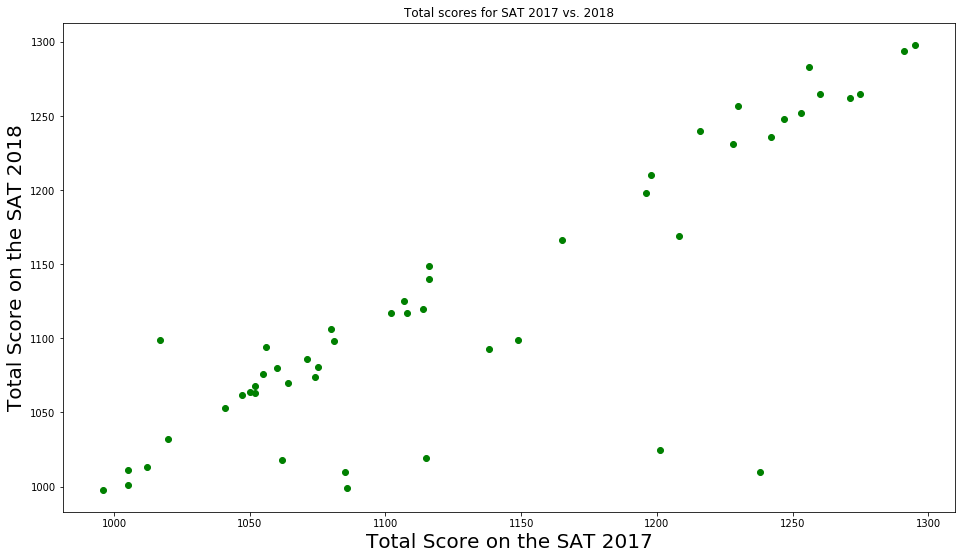

In [68]:
columns = ['total_sat_2017', 'total_sat_2018']
title = 'Total scores for SAT 2017 vs. 2018'
xlabel = 'Total Score on the SAT 2017'
ylabel = 'Total Score on the SAT 2018'
plot_scatter(final, columns, title, xlabel, ylabel, 'green')

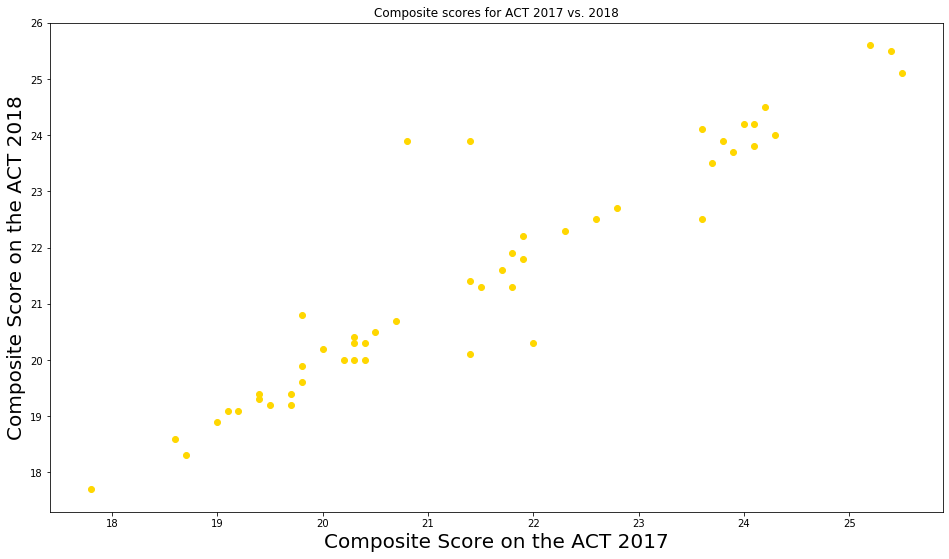

In [69]:
columns = ['composite_average_act_2017', 'composite_average_act_2018']
title = 'Composite scores for ACT 2017 vs. 2018'
xlabel = 'Composite Score on the ACT 2017'
ylabel = 'Composite Score on the ACT 2018'
plot_scatter(final, columns, title, xlabel, ylabel, 'gold')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

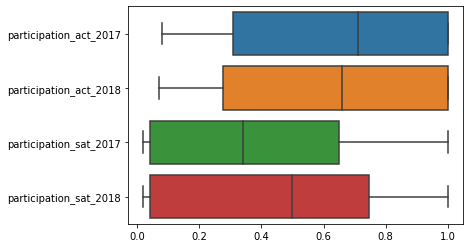

In [70]:
data_act_part1 = final.loc[:,['participation_act_2017','participation_act_2018', 'participation_sat_2017','participation_sat_2018']]
sns.boxplot(data = data_act_part1, orient="h");

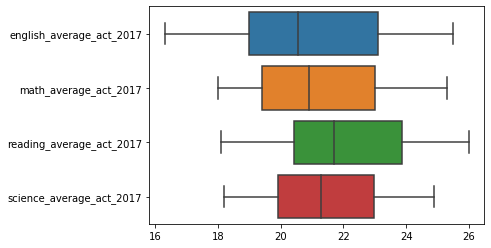

In [71]:
data_act_part2 = final.loc[:,['english_average_act_2017','math_average_act_2017','reading_average_act_2017', 'science_average_act_2017']]
sns.boxplot(data = data_act_part2, orient="h");

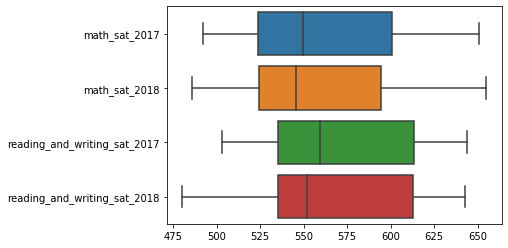

In [72]:
data_act_part3 = final.loc[:,['math_sat_2017','math_sat_2018','reading_and_writing_sat_2017', 'reading_and_writing_sat_2018']]
sns.boxplot(data = data_act_part3, orient="h");

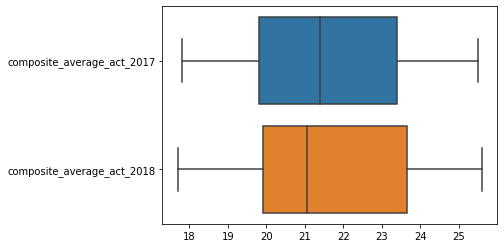

In [73]:
data_act_part4 = final.loc[:,['composite_average_act_2017','composite_average_act_2018']]
sns.boxplot(data = data_act_part4, orient="h");

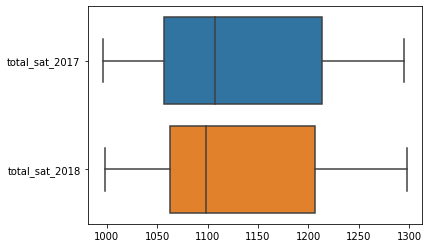

In [74]:
data_act_part5 = final.loc[:,['total_sat_2017','total_sat_2018']]
sns.boxplot(data = data_act_part5, orient="h");

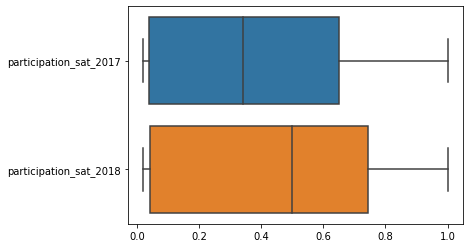

In [75]:
data_act_part1 = final.loc[:,['participation_sat_2017','participation_sat_2018']]
sns.boxplot(data = data_act_part1, orient="h");

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

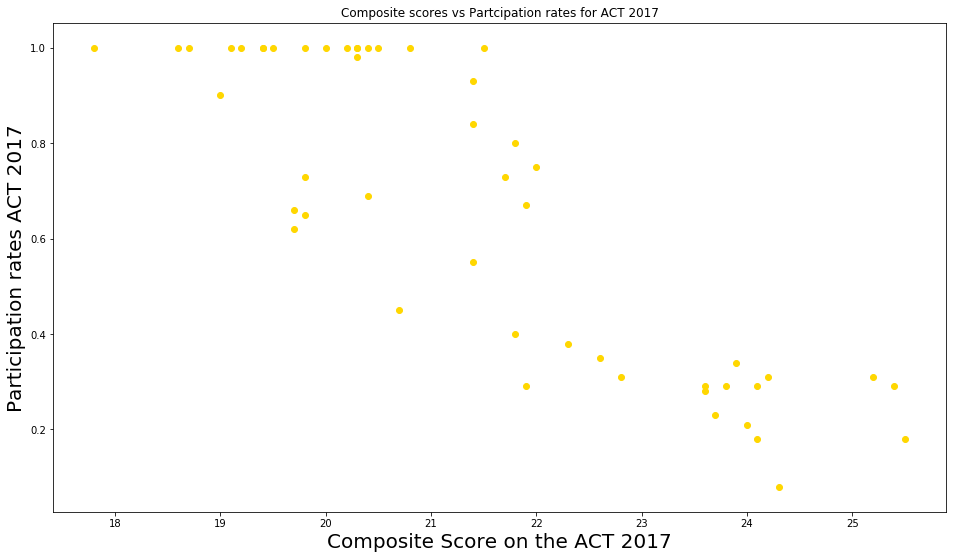

In [76]:
columns = ['composite_average_act_2017', 'participation_act_2017']
title = 'Composite scores vs Partcipation rates for ACT 2017'
xlabel = 'Composite Score on the ACT 2017'
ylabel = 'Participation rates ACT 2017'
plot_scatter(final, columns, title, xlabel, ylabel, 'gold')

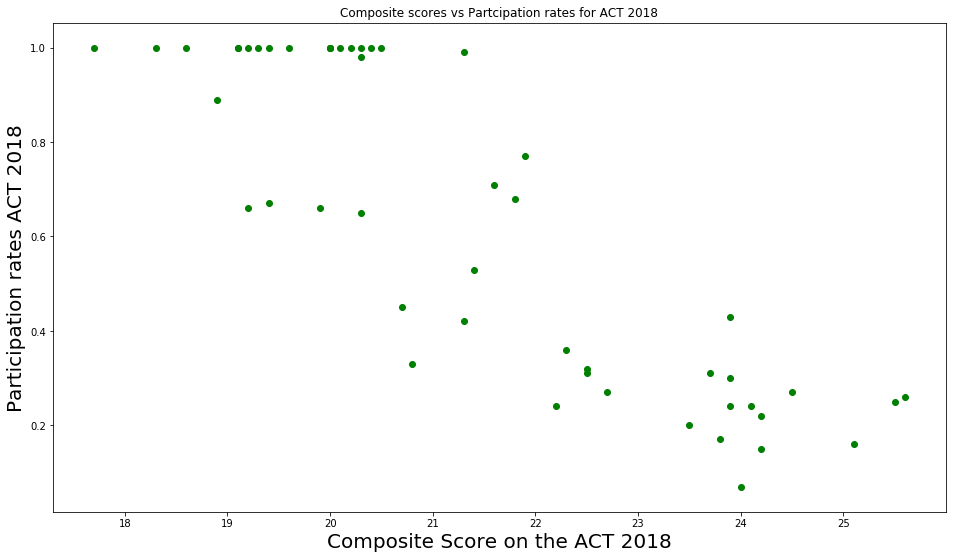

In [77]:
columns = ['composite_average_act_2018', 'participation_act_2018']
title = 'Composite scores vs Partcipation rates for ACT 2018'
xlabel = 'Composite Score on the ACT 2018'
ylabel = 'Participation rates ACT 2018'
plot_scatter(final, columns, title, xlabel, ylabel, 'Green')

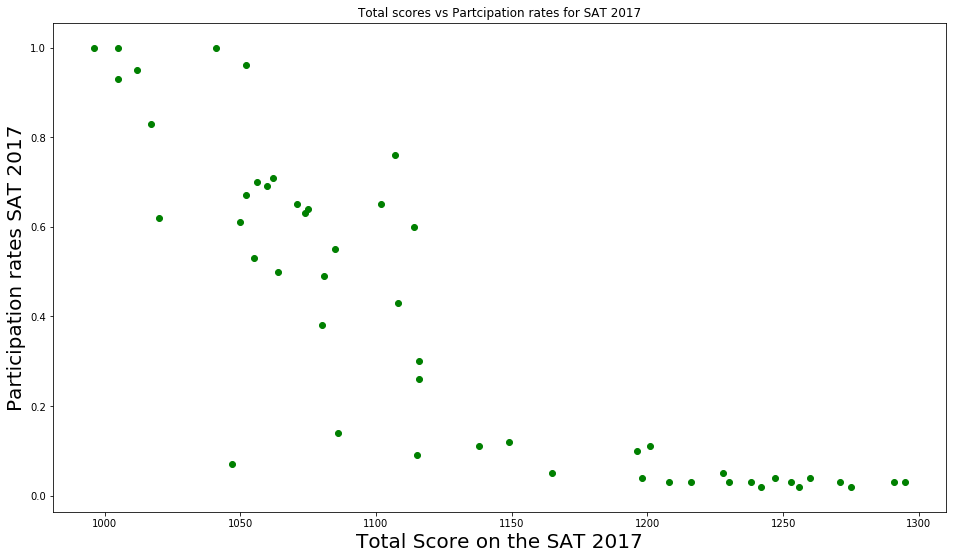

In [78]:
columns = ['total_sat_2017', 'participation_sat_2017']
title = 'Total scores vs Partcipation rates for SAT 2017'
xlabel = 'Total Score on the SAT 2017'
ylabel = 'Participation rates SAT 2017'
plot_scatter(final, columns, title, xlabel, ylabel, 'Green')

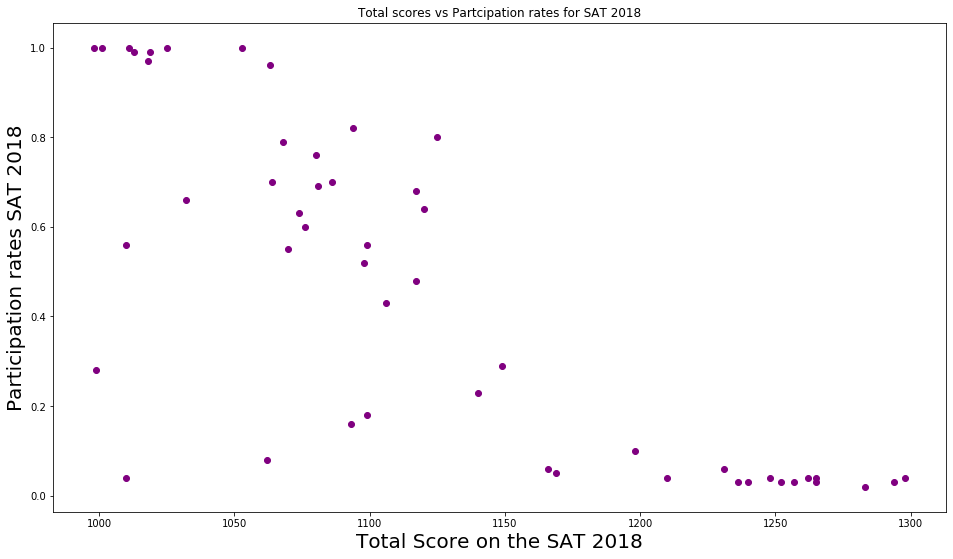

In [79]:
columns = ['total_sat_2018', 'participation_sat_2018']
title = 'Total scores vs Partcipation rates for SAT 2018'
xlabel = 'Total Score on the SAT 2018'
ylabel = 'Participation rates SAT 2018'
plot_scatter(final, columns, title, xlabel, ylabel, 'Purple')

<span style="color:blue">There is a strong negative correlation between all total/composite test scores and particaption rates for both the ACT and SAT.</span>

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

<span style="color:blue">For the State of Alabama, the ACT is a required test which is why we see a 100 particpation rate. (Soucre:http://www.mps.k12.al.us/departments/student_assessment/state_required_tests) For the State of Arkansas, the ACT is a required by law that every student take the test, which is why the particpation rate is 100.(Soucre: http://dese.ade.arkansas.gov/divisions/learning-services/assessment/act-aspire)
For the State of Kentucky, The state mandates "*...all grade 10 students participation in the state-required college admissions examination...*".(soucrce: https://education.ky.gov/AA/Assessments/Pages/ACT.aspx)</span>

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

<span style="color:blue"></span>

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [80]:
# Code: